In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv("C:/Users/Anamika/Downloads/Customers.csv")
products=pd.read_csv("C:/Users/Anamika/Downloads/Products.csv")
transactions=pd.read_csv("C:/Users/Anamika/Downloads/Transactions.csv")

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [8]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [9]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [10]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [19]:
print("Customer Region Distribution:")
print(customers['Region'].value_counts())

Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


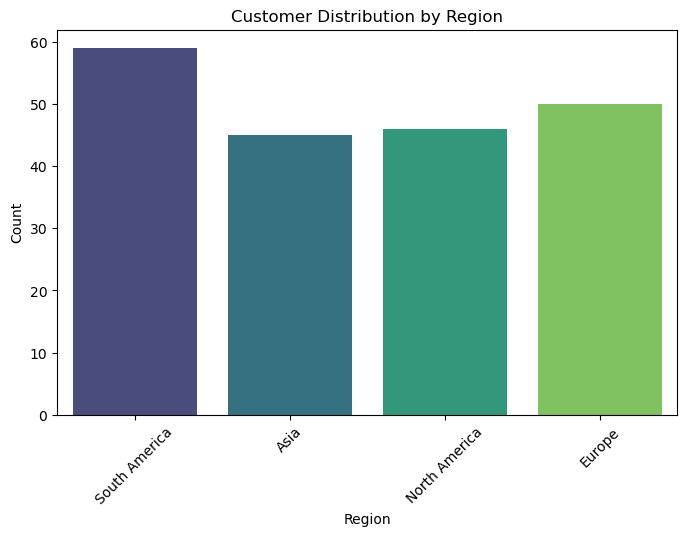

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [15]:

transactions = transactions.merge(customers, on="CustomerID", how="left")
region_revenue = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=True)
print(region_revenue)

Region
Asia             152074.97
North America    152313.40
Europe           166254.63
South America    219352.56
Name: TotalValue, dtype: float64


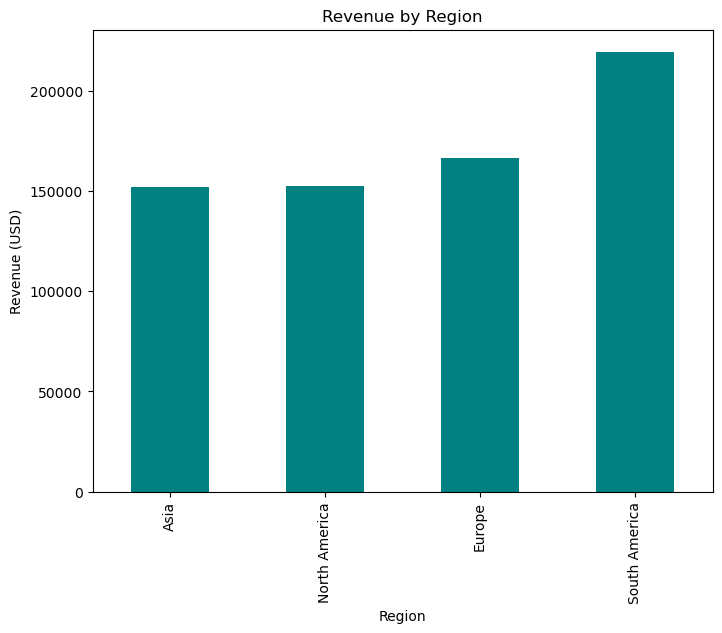

In [14]:
region_revenue.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title("Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.show()


In [38]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head()
print("Top Customers by Revenue:")
print(top_customers)

Top Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [39]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head()
print("Top Products by Quantity Sold:")
print(top_products)

Top Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [30]:
# Analyze Product Data
print("Product Categories Distribution:")
print(products['Category'].value_counts())

Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


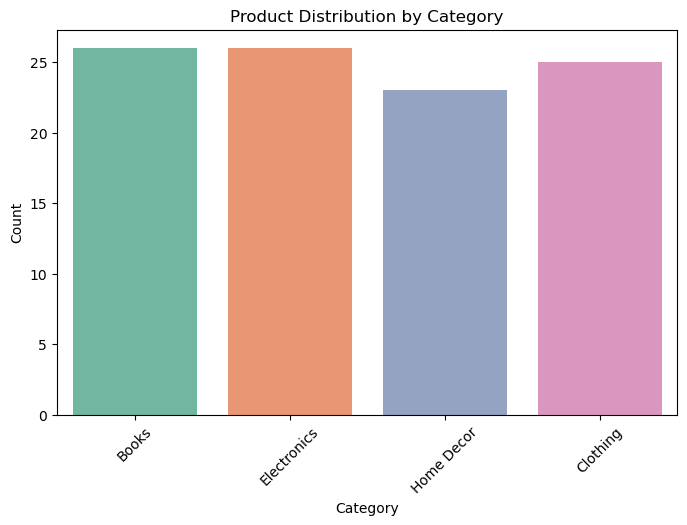

In [32]:
# Plot: Products by Category
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='Set2')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [16]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index().merge(products, on='ProductID')
print(top_products)

  ProductID  Quantity          ProductName     Category   Price
0      P059        46      SoundWave Jeans     Clothing  303.20
1      P054        46   SoundWave Cookbook        Books   57.30
2      P029        45   TechPro Headphones  Electronics  433.64
3      P079        43       ActiveWear Rug   Home Decor  417.37
4      P061        43  HomeSense Desk Lamp   Home Decor  156.96


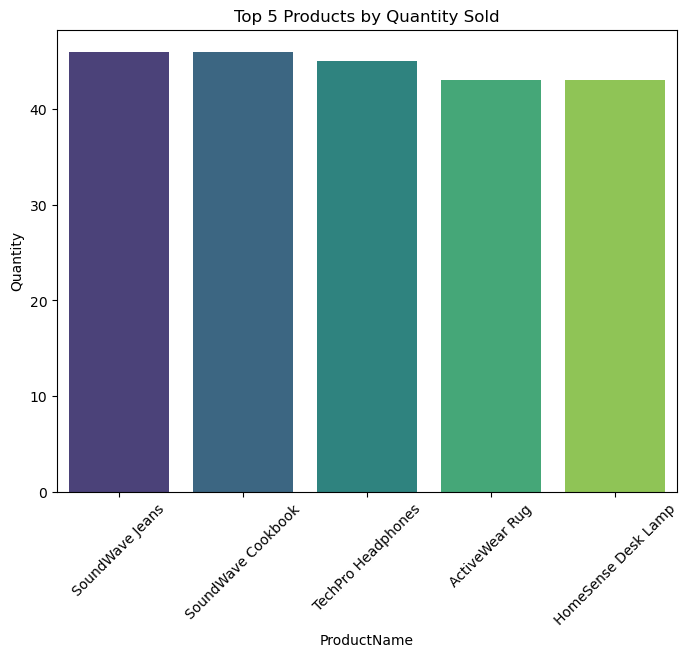

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')
plt.title("Top 5 Products by Quantity Sold")
plt.xticks(rotation=45)
plt.show()

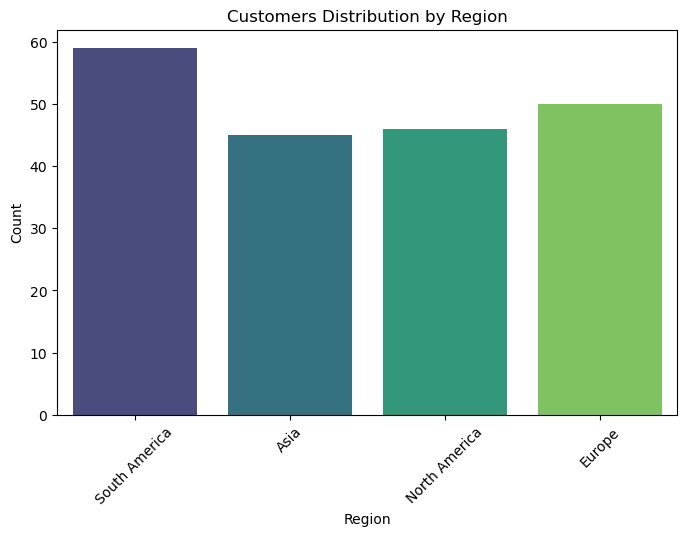

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customers Distribution by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [22]:
print("Product Categories Distribution:")
print(products['Category'].value_counts())

Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


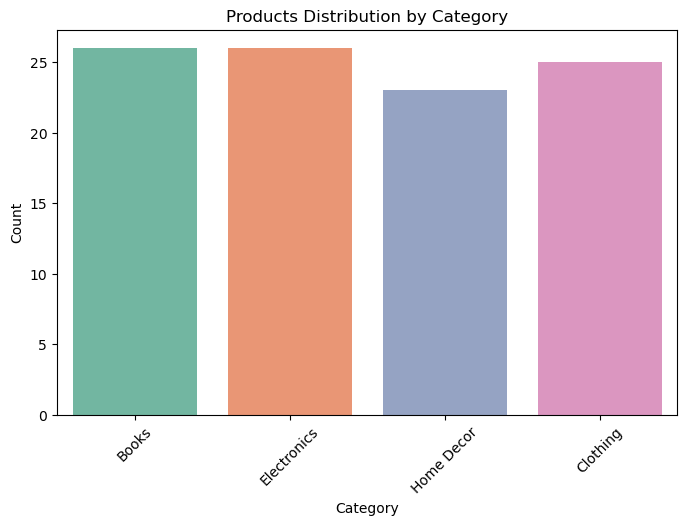

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='Set2')
plt.title("Products Distribution by Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

In [24]:
print("Top 5 Products by Quantity Sold:")
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head()
print(top_products)

Top 5 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


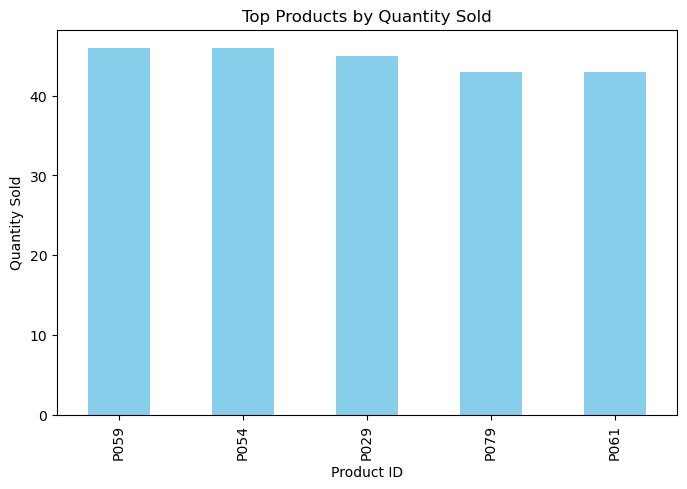

In [25]:
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product ID")
plt.show()

In [26]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_trends = transactions.groupby('MonthYear')['TotalValue'].sum()

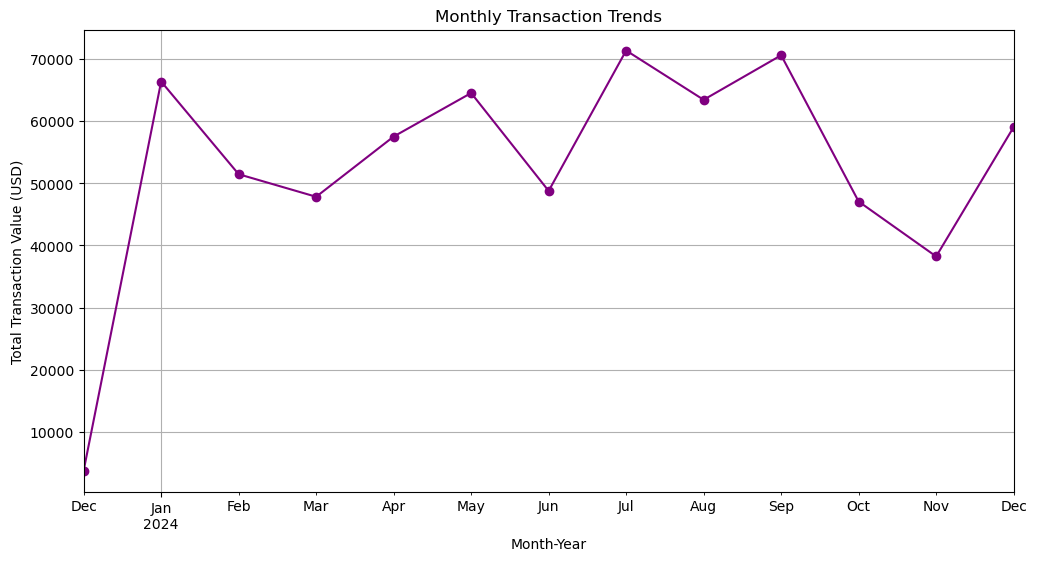

In [27]:
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Transaction Trends")
plt.ylabel("Total Transaction Value (USD)")
plt.xlabel("Month-Year")
plt.grid(True)
plt.show()